# Desarrollo del Proyecto 1 - Recomendación de películas
Hecho por: Alejandra Salas

### Exploratory_Data_Analyst (EDA)

## 1. Extraer los datos del archivo

In [25]:
# Se importan las librerías a usar.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy

In [26]:
# Cargamos los datos que se encuentran en archivo tipo ".csv" a un dataframe.
datos = pd.read_csv('datos_main.csv',sep=',')

In [27]:
# Visualizamos dos datos aleatorios del dataframe "datos".
datos.sample(2)

,id,budget,original_language,popularity,release_date,revenue,runtime,title,vote_average,vote_count,collection_names,genres,companies,countries,languages,release_year,return,Director
9812,69895,0,en,0.036699,1993-05-26,0.0,82.0,Stefano Quantestorie,6.0,1.0,NaN,Comedy,NaN,NaN,NaN,1993,0.0,Maurizio Nichetti
239300,84188,0,en,7.563444,2012-08-23,319285.0,90.0,Compliance,6.3,225.0,NaN,Crime,Muskat Filmed Properties,United States of America,English,2012,0.0,Craig Zobel


## 2. Analizar el dataframe "datos"

In [28]:
# Analizamos la estructura del dataframe para conocer con cuántas columnas y filas estaremos trabajando.
# Cuenta con 424,431 filas y 18 columnas.
datos.shape

(424431, 18)

In [29]:
# Visualizamos los nombres de las columnas de nuestro dataframe para saber de qué se tratan los datos contenidos en estas y poder escoger las variables requeridas.
datos.columns

Index(['id', 'budget', 'original_language', 'popularity', 'release_date',
       'revenue', 'runtime', 'title', 'vote_average', 'vote_count',
       'collection_names', 'genres', 'companies', 'countries', 'languages',
       'release_year', 'return', 'Director'],
      dtype='object')

In [30]:
# Visualizamos la información del dataframe, si tienen nulos y los tipos de datos para poder usarlos adecuadamente o poder convertirlos a otro tipo de datos.
datos.info()

# El dataframe "datos" cuenta con 3 variables de tipo int64, 9 tipo objeto y 6 tipo float64.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424431 entries, 0 to 424430
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 424431 non-null  int64  
 1   budget             424431 non-null  int64  
 2   original_language  424335 non-null  object 
 3   popularity         424431 non-null  float64
 4   release_date       424431 non-null  object 
 5   revenue            424431 non-null  float64
 6   runtime            423887 non-null  float64
 7   title              424431 non-null  object 
 8   vote_average       424431 non-null  float64
 9   vote_count         424431 non-null  float64
 10  collection_names   55238 non-null   object 
 11  genres             421287 non-null  object 
 12  companies          397322 non-null  object 
 13  countries          413069 non-null  object 
 14  languages          411960 non-null  object 
 15  release_year       424431 non-null  int64  
 16  re

## 3. Analizar datos faltantes

In [31]:
# Calculamos el porcentaje de valores faltantes en cada columna
datos_faltantes= datos.isnull().mean() * 100

# Filtramos las columnas que tienen valores faltantes
columnas_datos_faltantes = datos_faltantes[datos_faltantes > 0]

# Mostramos el porcentaje de valores faltantes en cada columna
print("Porcentaje de valores faltantes:")
print(columnas_datos_faltantes)

Porcentaje de valores faltantes:
original_language     0.022619
runtime               0.128172
collection_names     86.985399
genres                0.740756
companies             6.387139
countries             2.676996
languages             2.938287
Director              0.356242
dtype: float64


*Comentarios*:

-La variable que cuenta con mayores valores faltantes es la de "collection_name" con un 86.99%, porque no todas las películas cuentan con una franquicia.

-La segunda vaiable con mayores valores faltantes es la de "companies" con un 6.39%.

## 4. Analizar las variables

In [32]:
# Observamos los datos estadístos descriptivos de las variables cuantitativas para conocer generalmente los valores a tratar.
datos.describe()

,id,budget,popularity,revenue,runtime,vote_average,vote_count,release_year,return
count,424431.000000,4.244310e+05,424431.000000,4.244310e+05,423887.000000,424431.000000,424431.000000,424431.000000,4.244310e+05
mean,80357.477293,1.414182e+07,5.626900,3.305660e+07,108.846426,5.912819,318.833005,1999.446367,9.895660e+02
std,106459.322076,3.189471e+07,9.000893,1.090797e+08,31.733348,1.457287,862.736854,17.072368,1.041129e+05
min,2.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1874.000000,0.000000e+00
25%,10073.000000,0.000000e+00,0.958683,0.000000e+00,93.000000,5.300000,7.000000,1995.000000,0.000000e+00
50%,34449.000000,0.000000e+00,3.463550,0.000000e+00,105.000000,6.200000,34.000000,2004.000000,0.000000e+00
75%,92796.000000,1.200000e+07,8.291886,7.103838e+06,122.000000,6.900000,192.000000,2010.000000,2.552840e-01
max,469172.000000,3.800000e+08,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000,1.239638e+07


In [33]:
# Describimos las columnas del dataframe "datos" como guía.
descripción_columnas = {
    'id': 'ID de la película',
    'budget': 'Presupuesto de la película',
    'original_language': 'Idioma original de la película',
    'popularity': 'Popularidad de la película',
    'release_date': 'Fecha de lanzamiento de la película',
    'revenue': 'Ingresos generados por la película',
    'runtime': 'Duración de la película en minutos',
    'title': 'Título de la película',
    'vote_average': 'Promedio de votos de la película',
    'vote_count': 'Número de votos de la película',
    'collection_names': 'Franquicia de películas que pertenecen a la película',
    'genres':'Géneros asociados a la película',
    'companies': 'Nombres de las compañías de producción',
    'countries': 'Nombres de los países de producción',
    'language': 'Nombre del idioma',
    'release_year': 'Año de lanzamiento de la película',
    'return': 'Relación entre ingresos y presupuesto de la película',
    'Director': 'De-irectores de cada película'}

Histogramas y gráficos de cajas

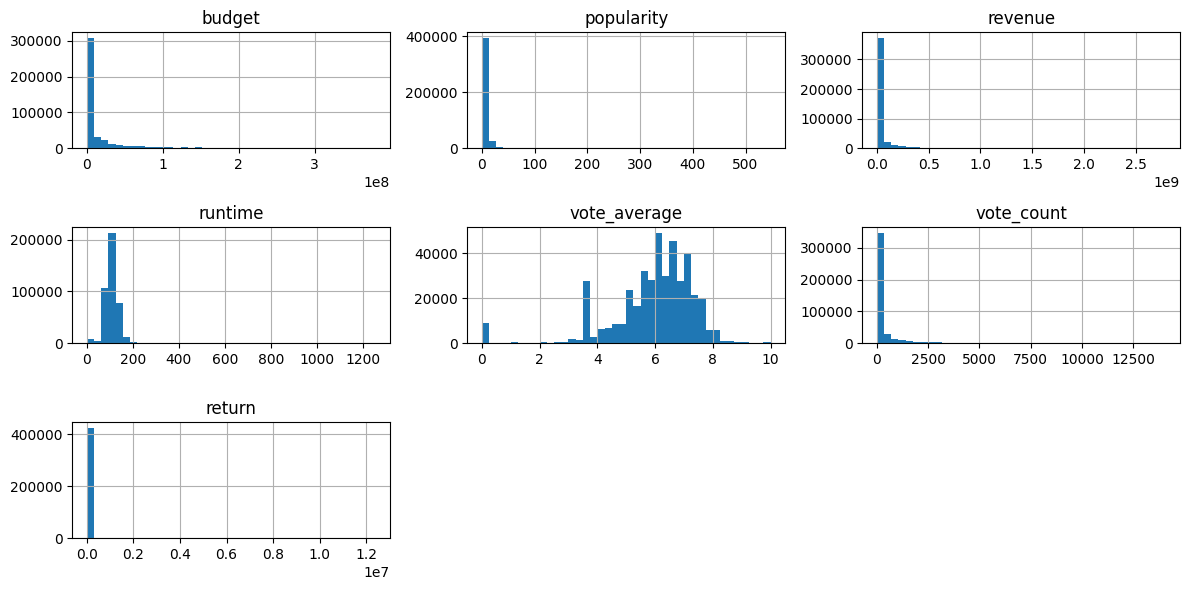

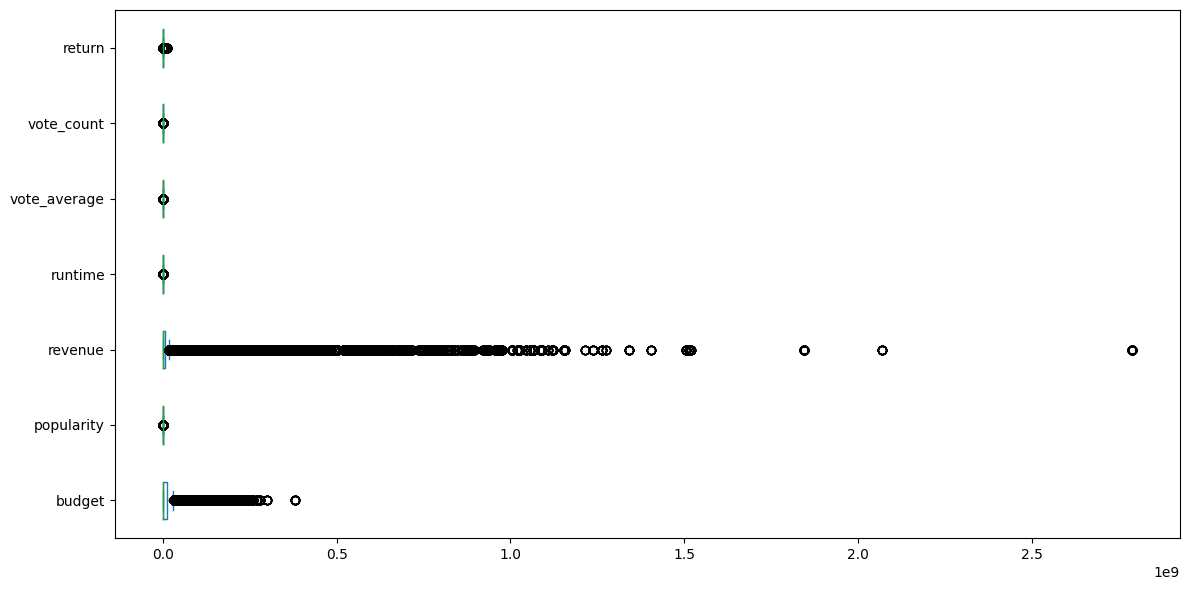

In [34]:
# Realizamos la visualización de cada variable cuantitativa.
columnas = ['budget','popularity',	'revenue', 'runtime', 'vote_average','vote_count', 'return']

# Generamos histogramas para las variables cuantitativas elegidas.
datos[columnas].hist(bins=40, figsize=(12, 6))
plt.tight_layout()
plt.show()

# Generamos gráficos de caja para las variables cuantitativas elegidas.
datos[columnas].plot(kind='box', vert=False, figsize=(12, 6))
plt.tight_layout()
plt.show()

Matriz de correlación

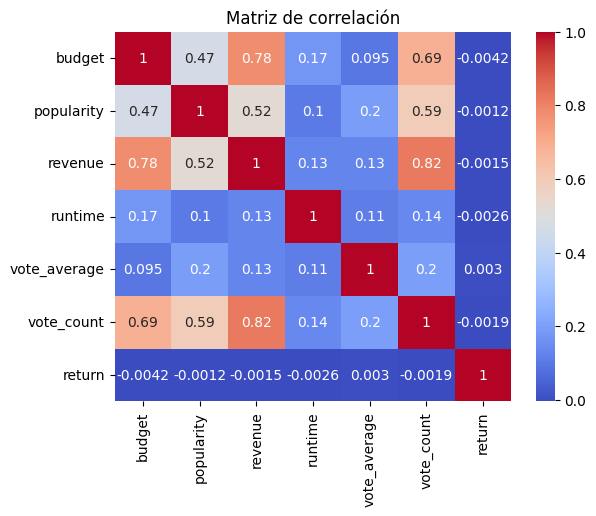

In [35]:
# Realizamos la matriz de correlación con las variables del dataframe "datos".
correlation_matrix = datos[columnas].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

Gráfico de la cantidad de películas por género

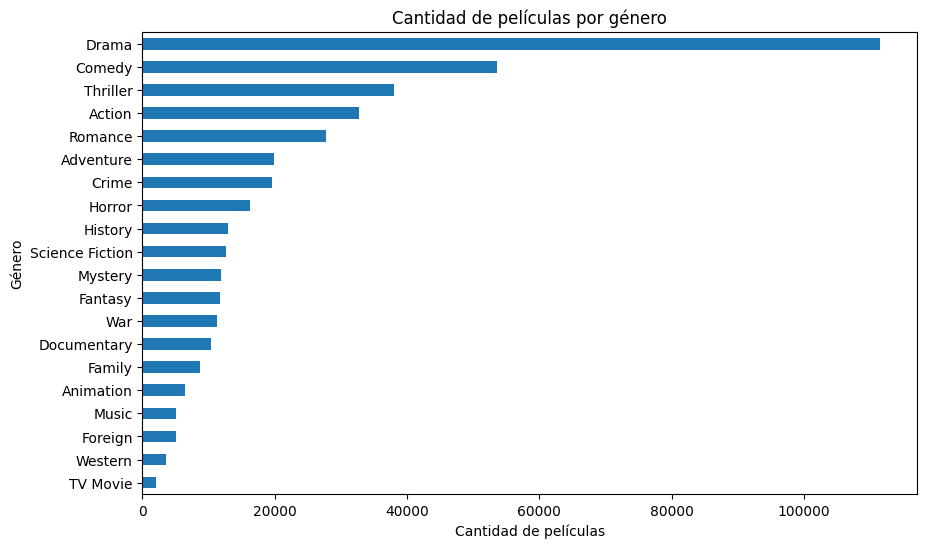

In [36]:
# Contamos la frecuencia de cada valor en la columna "genres".
conteo_generos = datos['genres'].value_counts()

# Eliminamos los géneros que solo aparecen una vez.
conteo_generos = conteo_generos[conteo_generos > 1]

# Graficamos la cantidad de peliculas por género.
conteo_generos = conteo_generos.sort_values()
plt.figure(figsize=(10,6)) 
conteo_generos.plot(kind='barh')  
plt.title('Cantidad de películas por género')  
plt.xlabel('Cantidad de películas')  
plt.ylabel('Género')  
plt.show() 

Gráfico de las 10 primeras películas con mayores ingresos generados

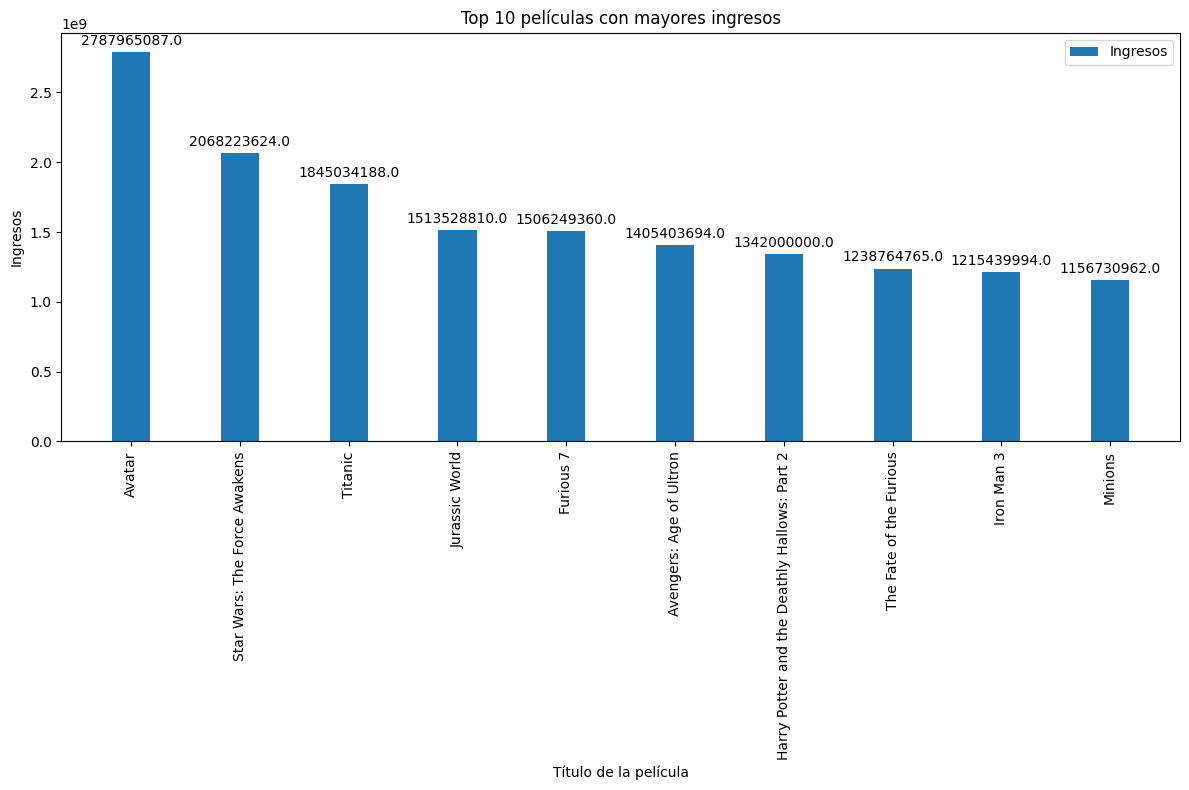

In [39]:
# Eliminamos filas duplicadas basadas en el título de la película, manteniendo la primera aparición
datos_unicos = datos.drop_duplicates(subset='title', keep='first')

# Ordenamos la columna "revenue" en orden descendente.
datos_ordenados= datos_unicos.sort_values(by='revenue', ascending=False)

# Seleccionamos las primeras 10 películas con mayores ingresos.
top_10_movies= datos_ordenados.head(10)

# Realizamos el gráfico para nuestro top_10.
index = top_10_movies['title']
revenue = top_10_movies['revenue']

fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.35
opacity = 0.8
bar1 = ax.bar(index, revenue, bar_width, label='Ingresos')

ax.set_xlabel('Título de la película')
ax.set_ylabel('Ingresos')
ax.set_title('Top 10 películas con mayores ingresos')
ax.legend()

# Etiquetamos las barras con los valores
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar1)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


*Comentarios*

La primera película con mayores ingresos es "Avatar", con $2,787 MM, siendo una de las películas más exitosas por la cantidad de recaudación en el cine.

Gráfico de las 10 primeras películas con mayores presupuestos generados

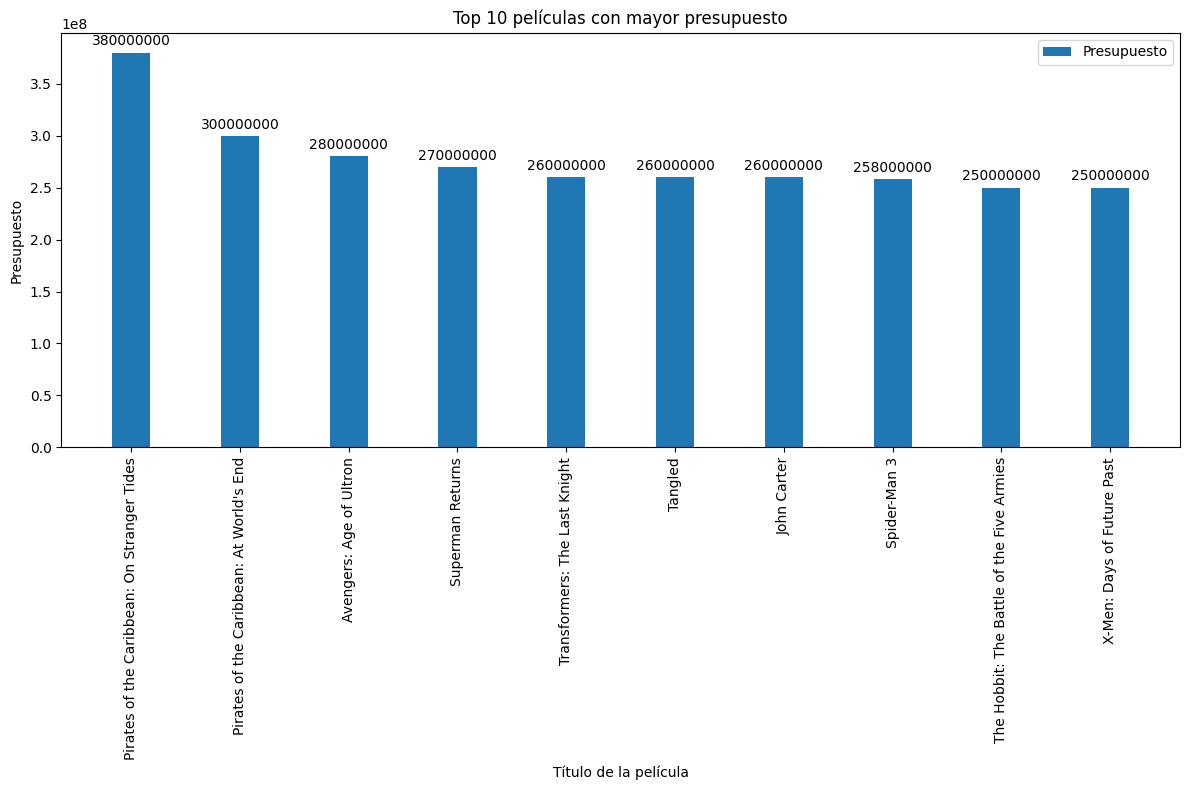

In [40]:
# Ordenamos la columna "budget" en orden descendente.
datos_ordenados = datos_unicos.sort_values(by='budget', ascending=False)

# Seleccionamos las primeras 10 películas con mayores presupuestos.
top_10 = datos_ordenados.head(10)

# Realizamos el gráfico para nuestro top_10.
index = top_10['title']
budget = top_10['budget']


fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.35
opacity = 0.8
bar1 = ax.bar(index, budget, bar_width, label='Presupuesto')

ax.set_xlabel('Título de la película')
ax.set_ylabel('Presupuesto')
ax.set_title('Top 10 películas con mayor presupuesto')
ax.legend()

# Etiquetamos las barras con los valores.
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar1)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


*Comentarios*

La primera película con mayor presupuesto es "Pirates of the Caribbean: On Stranger Tides", con $380 MM.

Gráfico de las distribución de películas por año de lanzamiento

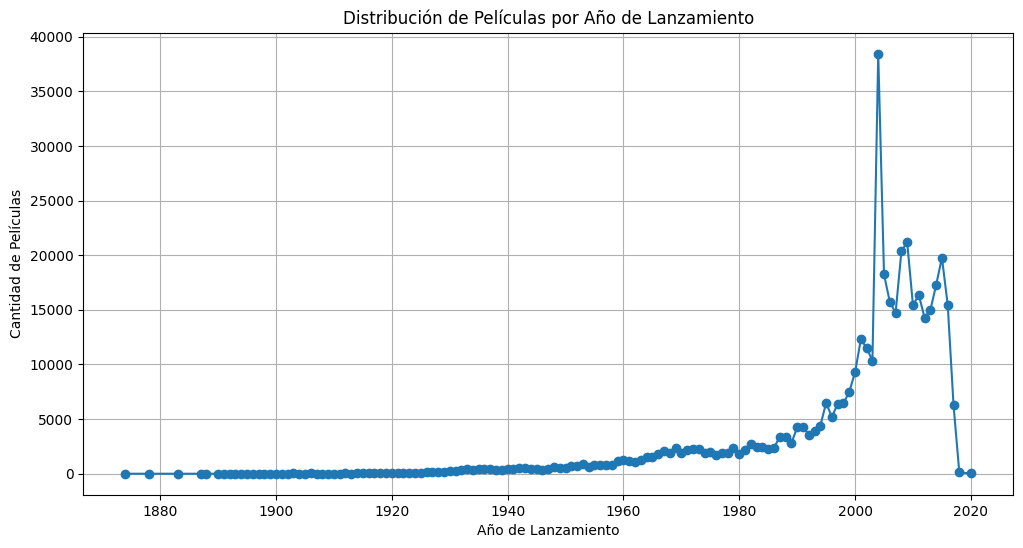

In [41]:
# Contamos la cantidad de películas lanzadas por año.
movies_per_year = datos['release_year'].value_counts().sort_index()

# Visualizamos la distribución de películas por año.
plt.figure(figsize=(12, 6))
plt.plot(movies_per_year.index, movies_per_year.values, marker='o')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Películas')
plt.title('Distribución de Películas por Año de Lanzamiento')
plt.grid(True)
plt.show()

*Comentarios*
El comportamiento de la curva es constante hasta el año 1980, a partir de ese año, empieza a aumentar la cantidad de películas lanzadas al mercado.El año que tuvo mayor lanzamiento de películas fue el 2004. 

Gráfico de películas por país

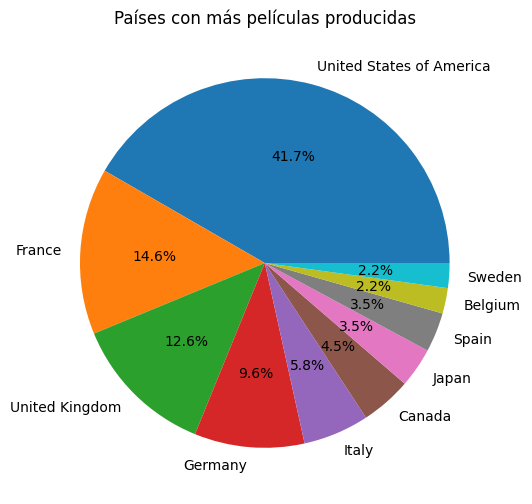

In [42]:
# Contamos las películas por país
country_counts = datos['countries'].value_counts()

# Limitamos nuestro top 10 países.
num_countries = 10
top_countries = country_counts.head(num_countries)

# Creamos el gráfico.
plt.figure(figsize=(8, 6))
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%')
plt.title('Países con más películas producidas')
plt.show()